<a href="https://colab.research.google.com/github/EddyGiusepe/Metrica_ROC_AUC/blob/main/ROC_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Avaliando o desempenho de um classificador com a métrica ROC-AUC</h2> 


**Cientista de Dados Jr.:**  Dr.Eddy Giusepe Chirinos Isidro

## <font color="orange">RESUMO DO QUE É: CURVA ROC</font>


A curva ROC é uma curva construída com base em uma ``classificação binária``. É uma medida de desempenho muito poderosa e usa como base as probabilidades retiradas de uma matriz de confusão, por exemplo temos:

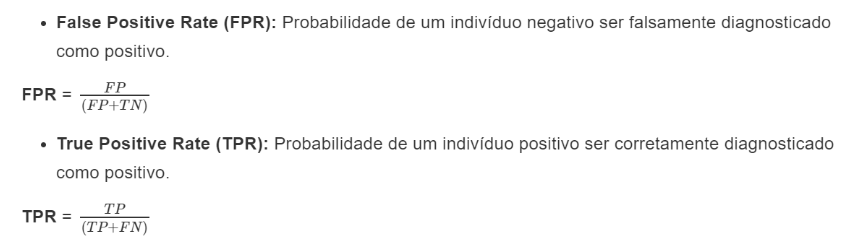

Dado essas estatísticas, construímos uma curva utilizando o ``FPR do modelo no eixo x`` (<font color="red">ESPECIFICIDADE:</font>) e o ``TPR no eixo y`` (<font color="red">SENSIBILIDADE</font>). E seus valores são calculados utilizando diversos limiares de classificação (porcentagem que denomina se um indivíduo é positivo ou negativo). 

**Por exemplo:** o início da curva representa um limiar onde todos os indivíduos são negativos, visto que seu FPR e seu TPR são iguais a 0%. Já o final da curva representa um limiar onde todos os indivíduos são classificados como positivos, visto que tanto o seu FPR quando seu TPR são iguais a 1 (100%).

<font color="red">SENSIBILIDADE:</font> Probabilidade de um caso clínico (QUE TEM A DOENÇA) ser corretamente diagnosticado pelo teste.


<font color="red">ESPECIFICIDADE:</font> É a probabilidade de um teste dar NEGATIVO dado que o indivíduo não tenha a doença.

Uma maneira de interpretar a curva ROC é a seguinte: quando mais próxima a curva estiver do canto superior esquerdo do gráfico, melhor o desempenho do modelo testado. Visto que obteremos um True Positive Rate mais próximo de 100% e um False Positive Rate mais próximo de 0%. Em outras palavras, classificadores bons apresentam uma área maior abaixo da curva, chamada também como AUC. Usualmente, ``uma AUC superior a 0,9 é considerada muito boa``. Caso o objetivo seja comparar dois métodos (ou mais) distintos, basta compararmos as AUC’s dos métodos: o método que apresentar maior AUC será o de melhor desempenho dentre os demais.

## Importamos as nossas bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


from sklearn.datasets import make_classification


# Link de estudo:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# https://www.youtube.com/watch?v=5-XvpQOlesk

## Carregamos nosso DataSet

O conjunto de dados Iris contém quatro características (comprimento e largura das sépalas e pétalas) de $50$ amostras de três espécies de Iris (Iris setosa, Iris virginica e Iris versicolor). Essas medidas foram usadas para criar um modelo discriminante linear para classificar as espécies. O conjunto de dados é frequentemente usado em mineração de dados, classificação e exemplos de agrupamento e para testar algoritmos. Estes DataSet pode ser baixado [aqui](https://archive.ics.uci.edu/ml/datasets/iris).

Informação de Atributo:

1. comprimento da sépala em cm
2. largura da sépala em cm
3. comprimento da pétala em cm
4. largura da pétala em cm
5. classe:
- Iris Setosa
- Iris Versicolour
- Iris Virginica



Ver também: [Data Science para iniciantes com Iris](https://pplpauloo.medium.com/data-science-para-iniciantes-iris-ec17b205f0d6).

In [ ]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X.shape

(150, 4)

In [ ]:
# As minha target
y.shape

(150,)

In [ ]:
print("shape X = ", np.shape(X))
print("Dimensions X = ", len(X.shape))

shape X =  (150, 4)
Dimensions X =  2


In [ ]:
print("shape y = ", np.shape(y))
print("Dimensions y = ", len(y.shape))

shape y =  (150,)
Dimensions y =  1


In [ ]:
X_df = pd.DataFrame(X)
X_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
# Notamos que temos três classes:
y_df = pd.DataFrame(y)
y_df.sample(15)

,0
147,2
96,1
25,0
23,0
124,2
41,0
43,0
39,0
83,1
69,1


In [ ]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [ ]:
# 0 --> É o nome da coluna
# Nesta coluna temos três classes

y_df[0].unique()


array([0, 1, 2])

In [ ]:
# Binarize the output
# Apenas zeros e uns
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [ ]:
y.shape

(150, 3)

In [ ]:
# Números de classes --> 0, 1 e 2
n_classes

3

In [ ]:
y_new = pd.DataFrame(y)
y_new 

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
# Adicione recursos barulhentos para tornar o problema mais difícil

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [ ]:
X.shape

(150, 804)

In [ ]:
X_new = pd.DataFrame(X)
X_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803
0,5.1,3.5,1.4,0.2,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,0.950088,-0.151357,-0.103219,0.410599,0.144044,1.454274,0.761038,0.121675,0.443863,0.333674,1.494079,-0.205158,0.313068,-0.854096,-2.552990,0.653619,0.864436,-0.742165,2.269755,-1.454366,0.045759,-0.187184,1.532779,1.469359,0.154947,0.378163,-0.887786,-1.980796,-0.347912,0.156349,...,-0.451303,0.265688,0.723100,0.024612,0.719984,-1.102906,-0.101697,0.019279,1.849591,-0.214167,-0.499017,0.021351,-0.919113,0.192754,-0.365055,-1.791328,-0.058587,-0.317543,-1.632423,-0.067134,1.489356,0.521304,0.611927,-1.341497,0.476898,0.148450,0.529045,0.422629,-1.359781,-0.041401,-0.757871,-0.050084,-0.897401,1.312470,-0.858972,-0.898942,0.074586,-1.077099,-0.424663,-0.829965
1,4.9,3.0,1.4,0.2,1.411172,0.785804,-0.057470,-0.391217,0.940918,0.405204,0.498052,-0.026192,-1.688230,-0.112466,-0.532490,0.645055,1.011842,-0.657951,0.468385,1.735879,-0.667713,1.681922,-0.852586,0.022960,-0.011146,0.011499,-0.837678,-0.591183,-0.667720,0.326963,0.330035,2.225944,1.370989,-0.509843,0.324870,0.997118,0.030602,-0.069642,0.051575,0.867277,...,1.587762,-0.643258,-1.133593,0.996760,-0.148766,0.096004,-0.045113,0.079122,0.850531,-0.839124,-1.011774,0.084968,-1.606440,-1.373054,1.866683,0.757468,-0.010056,1.238007,-1.040599,-0.315603,0.623454,0.890672,0.512917,-2.541239,-0.968082,0.477068,-0.355951,2.540232,0.926558,0.558082,-1.116950,-0.035297,0.241204,1.127784,0.881131,1.032989,-0.923912,1.412152,-1.380431,-0.535915
2,4.7,3.2,1.3,0.2,0.430771,-0.149892,-1.006037,-0.821550,-1.548254,0.531975,1.260569,-0.100394,-0.400349,-1.472323,0.913202,2.211304,-1.797456,-1.063433,-0.679593,-0.564318,0.227346,1.614250,1.008597,0.527597,-0.723929,-1.119628,-0.796775,1.548067,-0.061743,-0.446836,-0.183756,0.824618,-1.312850,1.414874,0.156476,-0.216344,0.442846,0.218397,-0.344196,-0.252711,...,-2.719679,-1.096602,0.016491,-1.221776,-0.652761,-1.458941,0.169878,0.090826,-0.481393,1.397065,1.497715,0.565267,-1.799771,-1.104690,0.407130,-0.628558,-0.487091,0.898967,0.510875,1.314154,-0.429209,1.375225,-0.554131,1.499491,0.105835,-0.860510,-1.631220,-0.301472,-0.256233,0.857662,-0.110591,-0.432432,1.077037,-0.224827,-0.576242,0.574609,-0.489828,0.658802,-0.596917,-0.222959
3,4.6,3.1,1.5,0.2,0.152177,-0.374126,-0.013451,0.815472,0.410602,0.480970,-0.635430,0.852830,0.669562,1.004419,-0.726366,-0.172459,0.633534,-0.608815,-0.226122,1.925806,1.951761,1.239941,0.938585,-1.019251,0.512562,-0.359117,-1.058572,-0.509006,0.115665,-0.547356,-0.550799,0.792041,0.144106,0.233458,0.111872,-0.675703,-1.370572,0.310565,-0.507037,-2.010782,...,1.141648,1.274155,-1.664698,0.430379,-0.042602,0.388289,1.115977,-0.920538,-1.620274,1.106191,-0.998485,-0.686220,0.204621,-0.686102,-1.592211,0.034190,-0.781485,0.597860,-0.506077,-0.688446,-0.210001,1.052153,0.907904,-1.093226,2.799708,-0.325776,-1.152416,0.888232,-0.361672,2.153720,0.847408,-0.198720,1.575307,0.849115,-1.228895,0.888394,-0.516487,-0.083326,0.131054,-0.879096
4,5.0,3.6,1.4,0.2,-1.333342,0.367784,-1.388233,-2.575203,-0.836106,0.331092,-0.269881,1.267131,0.183753,-0.766310,-0.439584,-1.436541,1.085797,-1.381100,-0.920408,-0.160286,0.002353,-1.502650,-0.905536,0.265041,1.129723,0.349004,-0.025810,-1.562409,-0.617342,0.521494,1.080947,0.889376,0.138072,1.204600,2.881461,-0.593862,-0.763116,1.518483,0.235465,0.112308,...,-0.967127,-1.010546,0.406657,0.483472,-1.672445,0.622075,0.860973,-1.690998,-0.690431,1.428892,1.006102,0.024793,0.501249,2.112020,0.502797,-1.220809,1.364939,-0.870939,0.993902,0.656271,0.889514,1.540933,-1.465914,-0.069589,1.946050,0.976382,0.177158,-1.023173,0.106720,-0.911881,-1.468367,0.576479,0.065306,-0.773513,0.394948,-0.503890,1.779559,-0.030572,1.577088,-0.812802
...,...,..

## Dividimos nosso DataSet: Dados de treino e Dados de teste.

In [ ]:
# Embaralhar e dividir os conjuntos de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random_state)

In [ ]:
X_train.shape

(105, 804)

In [ ]:
len(X_train.shape)

2

In [ ]:
X_test.shape

(45, 804)

In [ ]:
y_train.shape

(105, 3)

In [ ]:
y_test.shape

(45, 3)

In [ ]:
# Aprenda a prever (predict) cada classe contra a outra

classifier = OneVsRestClassifier(svm.SVC(kernel="linear", probability=True, random_state=random_state))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
y_score.shape

(45, 3)

In [ ]:
y_score_eddy = pd.DataFrame(y_score)
y_score_eddy.head(5)

,0,1,2
0,-0.067164,-0.594309,-0.348062
1,-0.074371,-0.339684,-0.582431
2,-0.269154,-0.733283,0.004740
3,-0.309726,-0.741595,0.070400
4,-0.259621,-0.602906,-0.159475


In [ ]:
print(min(y_score_eddy[0]))
print(max(y_score_eddy[0]))
print("")
print(min(y_score_eddy[1]))
print(max(y_score_eddy[1]))
print("")
print(min(y_score_eddy[2]))
print(max(y_score_eddy[2]))



-1.0067884780105483
0.580577767167011

-1.1826857954829768
0.18562794473881228

-1.2011315709751875
0.568845407494198


In [ ]:
y_test_eddy = pd.DataFrame(y_test)
y_test_eddy.head(5)

,0,1,2
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [ ]:
# Calcular a curva ROC e a área ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # Lembrar que temos três clases
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Calcular a curva ROC micro-média e a área ROC

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
y_test.ravel()

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0])

In [ ]:
y_test.ravel().shape

(135,)

In [ ]:
y_score.ravel()

array([-0.06716418, -0.59430941, -0.34806167, -0.07437102, -0.33968362,
       -0.5824305 , -0.26915447, -0.73328342,  0.00473971, -0.30972595,
       -0.7415946 ,  0.07040005, -0.25962102, -0.60290589, -0.15947504,
        0.24411897, -0.66556548, -0.56898476,  0.06900163, -0.41821687,
       -0.69089997,  0.58057777, -0.4768514 , -1.09272903, -1.00678848,
        0.17946966, -0.17775566, -0.86437699, -0.41663281,  0.28385861,
       -0.16490991, -0.63970555, -0.22126445, -0.22444769, -1.1826858 ,
        0.33153254, -0.7850527 , -0.22437163,  0.0139686 , -0.78587716,
       -0.54997382,  0.30371051, -0.59443053, -0.45189023,  0.07036144,
        0.31832579, -0.42918204, -0.87309821, -0.34344294, -0.60131175,
       -0.04082559, -0.44893082, -0.32960059, -0.26123584,  0.18453496,
       -1.16156754, -0.0515057 , -0.17548084, -0.61833   , -0.20402617,
       -0.19462619, -0.37128442, -0.42589582, -0.45531494, -0.11872929,
       -0.42633434, -0.71039341, -0.71100917,  0.43510484, -0.65

In [ ]:
y_score.ravel().shape

(135,)

In [ ]:
print(min(y_score.ravel()))
print(max(y_score.ravel()))


-1.2011315709751875
0.580577767167011


In [ ]:
print(roc_auc[0])
print(roc_auc[1])
print(roc_auc[2])

0.9285714285714286
0.3477366255144034
0.7932692307692308


In [ ]:
roc_auc

{0: 0.9285714285714286,
 1: 0.3477366255144034,
 2: 0.7932692307692308,
 'micro': 0.6619753086419753}

## A seguir graficamos nossa curva ROC para cada classe

<font color="orange">**Plot of a ROC curve for a specific class**</font>

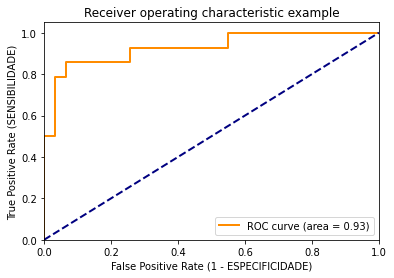

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - ESPECIFICIDADE)")
plt.ylabel("True Positive Rate (SENSIBILIDADE)")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

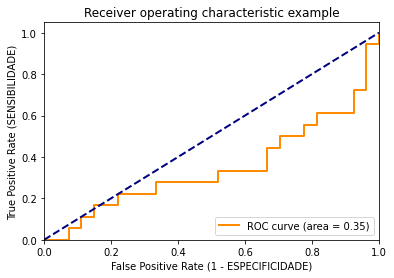

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - ESPECIFICIDADE)")
plt.ylabel("True Positive Rate (SENSIBILIDADE)")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

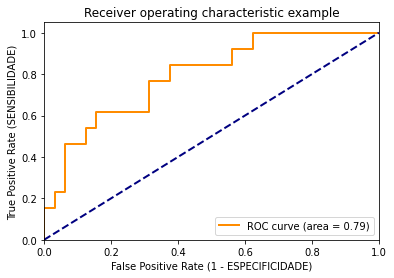

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - ESPECIFICIDADE)")
plt.ylabel("True Positive Rate (SENSIBILIDADE)")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
fpr[1].shape

(28,)

In [ ]:
fpr[2].shape

(20,)

In [ ]:
tpr[1].shape

(28,)

In [ ]:
tpr[2].shape

(20,)